In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("../Downloads/diabetes.csv")

In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
x = df.drop(columns=["Outcome"])
y = df["Outcome"]

In [6]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [8]:
from sklearn.tree import DecisionTreeClassifier

In [9]:
model = DecisionTreeClassifier()
model.fit(xtrain, ytrain)

DecisionTreeClassifier()

In [11]:
ypred = model.predict(xtest)
ypred

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

Accuracy score is: 0.7727272727272727
              precision    recall  f1-score   support

           0       0.88      0.79      0.83       107
           1       0.60      0.74      0.67        47

    accuracy                           0.77       154
   macro avg       0.74      0.76      0.75       154
weighted avg       0.79      0.77      0.78       154



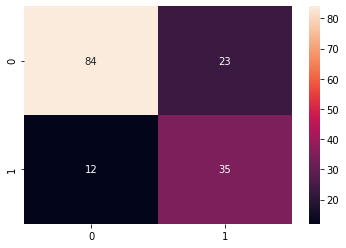

In [13]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
cm = confusion_matrix (ytest, ypred)
sns.heatmap(cm, annot = True)
print("Accuracy score is:", accuracy_score(ytest, ypred))
print(classification_report(ytest, ypred))

In [18]:
#model 
model = DecisionTreeClassifier()
criterion = ["gini", "entropy"]
splitter = ["best", "random"]
max_depth = range(1, 11)
#parameters
grid = dict(criterion = criterion, splitter = splitter, max_depth = max_depth)
#cv
from sklearn.model_selection import RepeatedStratifiedKFold
cv = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 3, random_state = 0)
#grid Searh cv
from sklearn.model_selection import GridSearchCV
grid_cv = GridSearchCV(estimator = model, param_grid = grid, cv = cv, scoring = "accuracy")
res = grid_cv.fit(xtrain, ytrain)
print(res.best_params_)
print(res.best_score_)

{'criterion': 'gini', 'max_depth': 2, 'splitter': 'best'}
0.7382689934778776


Accuracy is 0.7532467532467533
              precision    recall  f1-score   support

           0       0.79      0.87      0.83       107
           1       0.62      0.49      0.55        47

    accuracy                           0.75       154
   macro avg       0.71      0.68      0.69       154
weighted avg       0.74      0.75      0.74       154



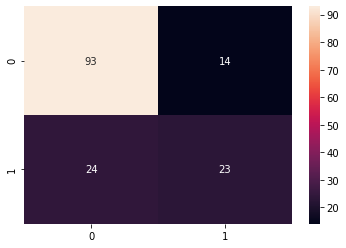

In [21]:
model = DecisionTreeClassifier(criterion = 'entropy', max_depth = 4, splitter = 'best' ,max_features = "log2")
model.fit(xtrain, ytrain)
ypred = model.predict(xtest)
#Evaluation
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
cm = confusion_matrix(ytest, ypred)
sns.heatmap(cm, annot = True)
print("Accuracy is", accuracy_score(ytest, ypred))
print(classification_report(ytest, ypred))